### Comparing the normalized aim portfolio to the optimal portfolio without trading costs

In [1]:
import sys
sys.path.append("utils")
import dynamic_backtesting as db
import compare_strategies as cs
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.style.use('seaborn')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["grey", "green", "black", "deepskyblue", "orange", "lime", "purple", "Gold", "brown", "blue", "pink"]) 

In [2]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
stocks = tickers[:7]
commodities = tickers[7:9]
bonds = tickers[9:]

In [54]:
asset_choice = ['IEV', 'TLT']

In [55]:
v_t_GARCH, out_of_sample_s_GARCH, in_sample_s_GARCH,Omega_t_GARCH = db.garch_no_trading_cost(asset_choice, number_of_out_of_sample_days=4*250, model_type="sGARCH11")
v_t_GARCH.index = pd.to_datetime(v_t_GARCH.index)
v_t_GARCH = v_t_GARCH.iloc[1:]

['IEV', 'TLT']


In [56]:
out_of_sample, in_sample, sigmas, residuals, params_dict = db.split_fit_parse(tickers=asset_choice, start="2008-01-01", end="2021-10-02", number_of_out_of_sample_days=250*4,model_type="sGARCH11")

Omega_ts = db.calc_Omega_ts(out_of_sample_returns=out_of_sample, in_sample_returns=in_sample,
                         in_sample_sigmas=sigmas, in_sample_residuals=residuals, **params_dict)
# Generating weights
v_t, aims, modifiers = db.calc_weights_garch_with_trading_cost(Omega_ts, out_of_sample, tuning_gamma_D=None)
# Construct index for weights that start in period T (last in-sample period)
aim_index = pd.to_datetime(out_of_sample.index)
aims = pd.DataFrame(aims, index=aim_index, columns=asset_choice)

['IEV', 'TLT']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 1.526988705495546e-06


In [57]:
empty_labels= ["_Hidden label"]*(len(asset_choice)-1)
label_garch=["Min. variance weights, no trading costs"]
label_aim=["Normalized aim portfolio weights"]
label_aim.extend(empty_labels)
label_garch.extend(empty_labels)

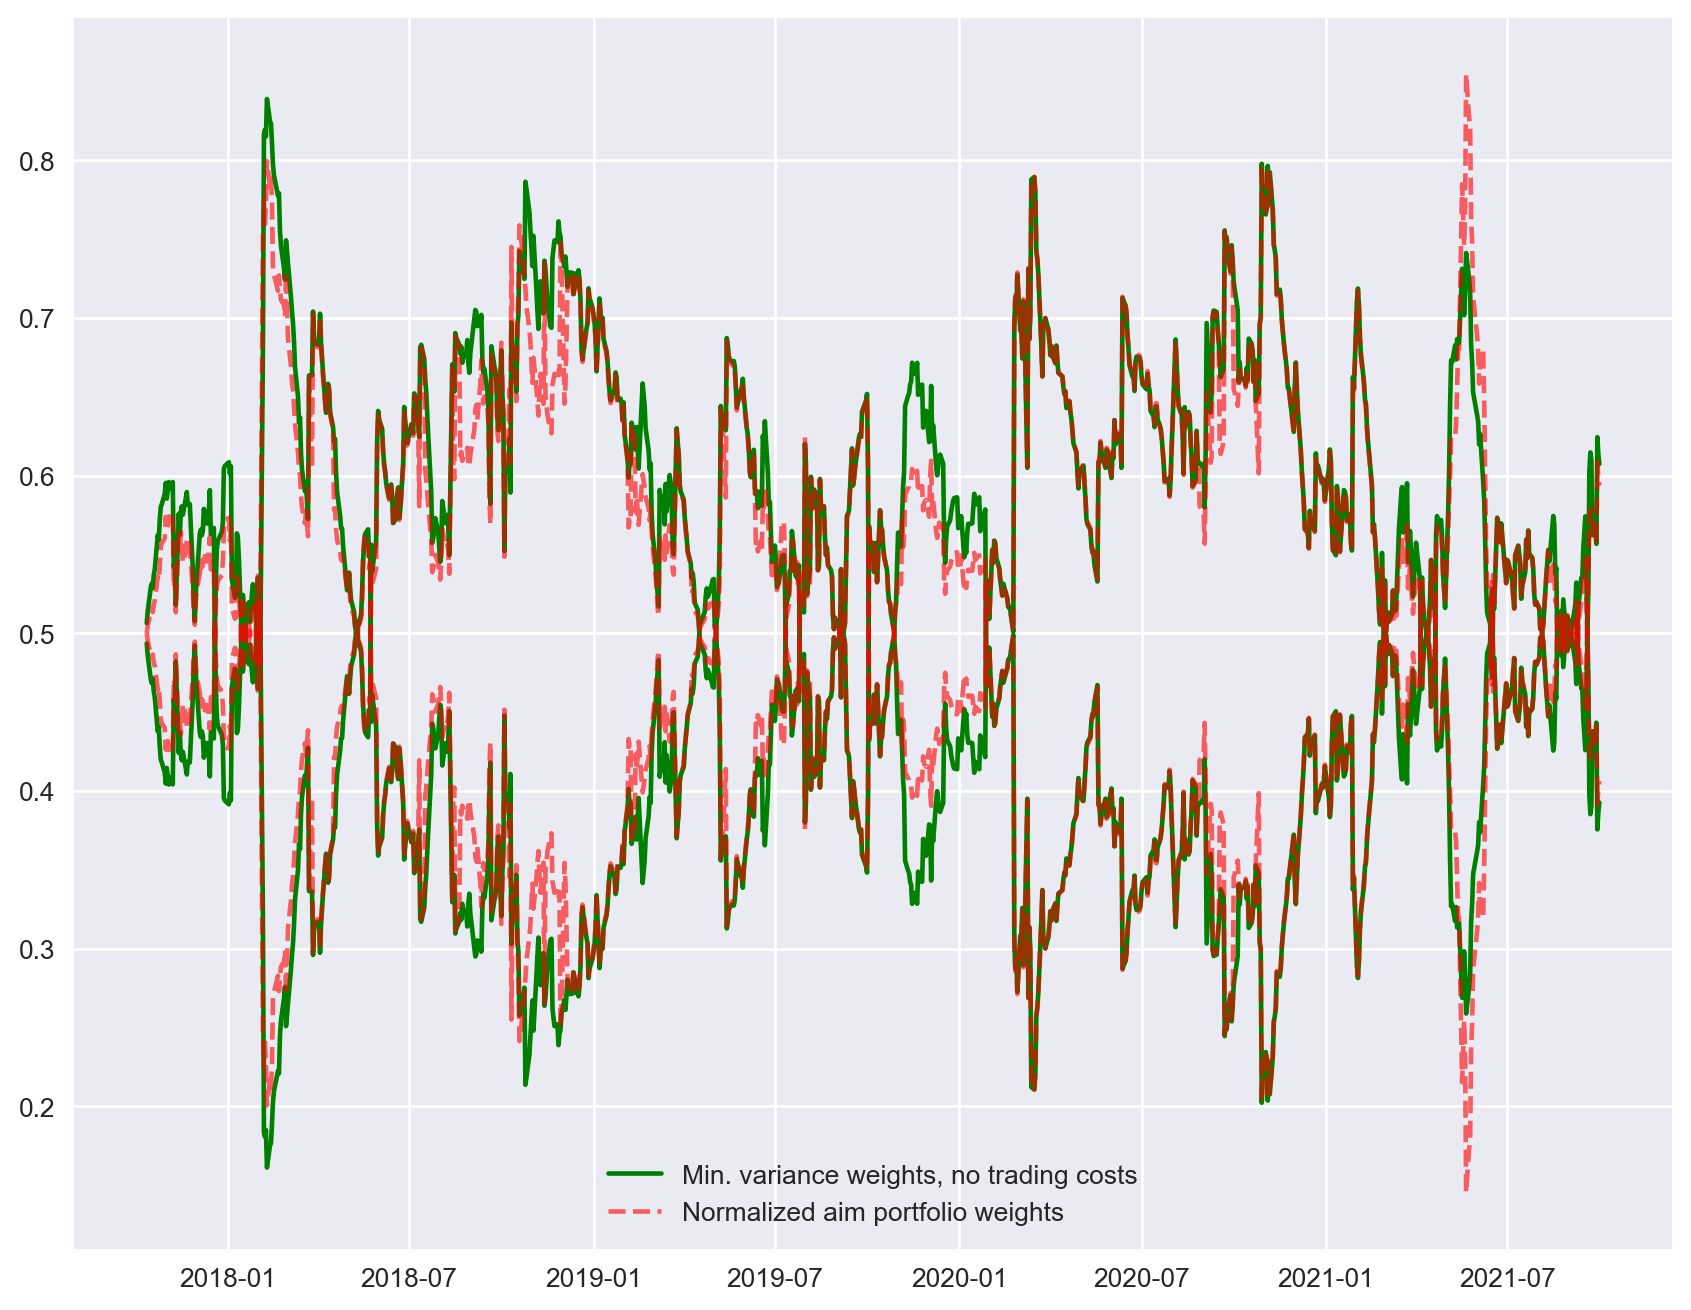

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH, c='green', label=label_garch)   # See: https://blog.rtwilson.com/easily-hiding-items-from-the-legend-in-matplotlib/
ax.plot(aims, alpha=.6, c='red', linestyle="--", label=label_aim)
plt.tight_layout()
plt.legend()
#fig.savefig('output/aim_portfolio_similarity.png', bbox_inches="tight")